# Clustering

A **Cluster** refers to a collection of data points aggregated together because of certain similarities.

Clustering is the unsupervised classification of patterns (observations, data
items, or feature vectors) into groups (clusters).Clustering is the task of dividing the population or data points into a number of groups such that data points in the same groups are more similar to other data points in the same group than those in other groups.


Clustering is often confused with classification, but there is difference
between the two. In classification the objects are assigned to pre defined classes,
whereas in clustering the classes are formed. The term “ class” is in fact frequently
used as synonym to the term “cluster”.




### Distance Metrics

We have these three most commonly used distance:- 

>1. **Euclidean Distance** captures the  distance by aggregating the squared difference in each variable.
>2. **Manhattan distance** captures the distance between two points by aggregating the pairwise absolute difference
    between each variable
>3. **Chebychev distance** calculates the maximum of the absolute differences between the features of a pair 
    of data points. 



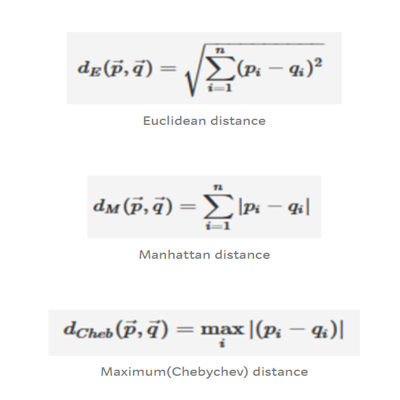

In [127]:
import os
import time
os.getcwd()
from PIL import Image
img = Image.open('Distance.png')
img.resize((400,400))

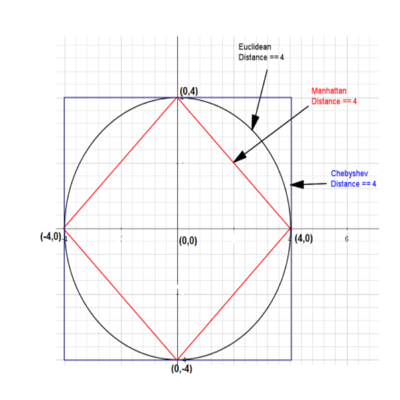

In [140]:
img = Image.open('Distance_comparison.png')
img.resize((400,400))

### Generalized Formula

**Minkowski Distance** This is a generalized formula for calculating distance. 
 used with ***p*** being 1 or 2, which corresponds to the Manhattan distance and the Euclidean distance, respectively. In the limiting case of ***p*** reaching infinity, we obtain the Chebyshev distance.

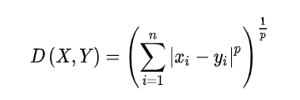

In [137]:
img = Image.open('Minkowski.png')
img.resize((300,100))

# 1. K-Means Algorithm

K-means clustering is one of the simplest and popular unsupervised machine learning algorithms.
    It is an  iterative clustering algorithms in which the notion of similarity is derived by the closeness of a data point to the centroid of the clusters
    
The k-means algorithm divides a set of N  samples X into K disjoint clusters , each described by the mean 
of the samples in the cluster. The means are commonly called the cluster “centroids”

The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:

 
 


### Assumptions

>1. Clusters are spherical and here Spherical assumption helps in separating the clusters when the algorithm works on the data and forms clusters
>2. Clusters are of similar size which helps in deciding the boundaries of the cluster and in calculating the number of data points each cluster should have. This assumption also gives an advantage. Clusters in K-means are defined by taking the mean of all the data points in the cluster. With this assumption, one can start with the centers of clusters anywhere.

### Steps

>K-means Algorithm for finding K clusters
This method involves:
>1. Specify K points as the initial centroids
>2. Find the distance of each point from the centroid and assign all the points to the cluster with the closest
    centroid.
>3. Recompute the centroid of each cluster.
>4. The algorithm repeats these last two steps until this value is less than a threshold.



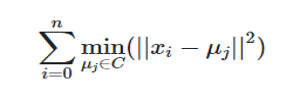

In [142]:
img = Image.open('WCSS.png')
img.resize((300,100))

### Parameters:

**init** controls the initialization technique. The standard version of the k-means algorithm is implemented by setting init to "random". Setting this to "k-means++" employs an advanced trick to speed up convergence, which we can see later.

"k-means++" initializes the centroids to be (generally) distant from each other, leading to provably better results than random initialization, as shown in the reference.

**n_clusters** sets k for the clustering step. This is the most important parameter for k-means.

**n_init** sets the number of initializations to perform. This is important because two runs can converge on different cluster assignments. The default behavior for the scikit-learn algorithm is to perform ten k-means runs and return the results of the one with the lowest SSE.

**max_iter** sets the number of maximum iterations for each initialization of the k-means algorithm


### Choosing the Appropriate Number of Clusters
In this section, you’ll look at two methods that are commonly used to evaluate the appropriate number of clusters:

1. The Elbow method
2. The Silhouette coefficient

These are often used as complementary evaluation techniques rather than one being preferred over the other. 

**The Elbow Method**

>When you plot SSE as a function of the number of clusters. 
 As more centroids are added, the distance from each point to its closest centroid will decrease.

>There’s a spot where the SSE curve starts to bend known as the elbow point. The x-value of this point is thought to be   a reasonable trade-off between error and number of clusters.


**The Silhouette coefficient** 

It is a measure of cluster cohesion and separation. It quantifies how well a data point fits into its assigned cluster based on two factors:

>How close the data point is to other points in the cluster

>How far away the data point is from points in other clusters

The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. 
The Silhouette Coefficient for a sample is (b - a) / max(a, b). 
To clarify, b is the distance between a sample and the nearest cluster that the sample is not a part of. Note that Silhouette Coefficient is only defined if number of labels is 2 <= n_labels <= n_samples - 1.

Silhouette coefficient values range between -1 and 1. Larger numbers indicate that samples are closer to their clusters than they are to other clusters.

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans



### Visualize Data

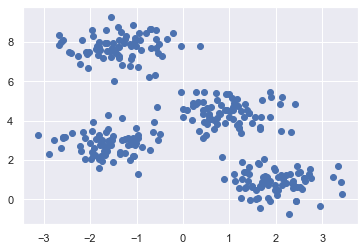

In [109]:
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:,0], X[:,1])

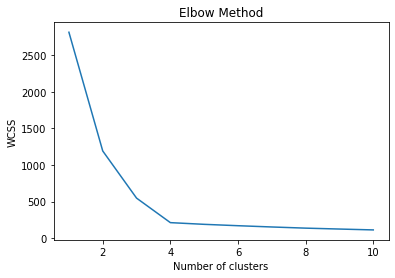

In [68]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

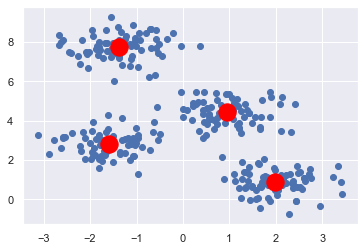

0.36502647399902344

In [122]:
start = time.time()
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)
plt.scatter(X[:,0], X[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()
end = time.time()
end-start

## Mini Batch K Means

The MiniBatchKMeans is a variant of the KMeans algorithm which uses mini-batches to reduce the computation time, while still attempting to optimise the same objective function. Mini-batches are subsets of the input data, randomly sampled in each training iteration.

In the first step,  samples are drawn randomly from the dataset, to form a mini-batch. These are then assigned to the nearest centroid. In the second step, the centroids are updated

### Steps

>1. Samples are drawn randomly from the dataset to form a mini-batch.
>2. These are then assigned to the nearest centroid.
>3. The centroids are updated accordingly.

In [124]:
from sklearn.cluster import MiniBatchKMeans, KMeans 
from sklearn.metrics.pairwise import pairwise_distances_argmin 
from sklearn.datasets.samples_generator import make_blobs 

start = time.time()
# Load data in X  
batch_size = 45
# perform the mini batch K-means 
mbk = MiniBatchKMeans(init ='k-means++', n_clusters = 4, 
                      batch_size = batch_size, n_init = 10, 
                      max_no_improvement = 10, verbose = 0) 
  
mbk.fit(X) 
mbk_means_cluster_centers = np.sort(mbk.cluster_centers_, axis = 0) 
mbk_means_labels = pairwise_distances_argmin(X, mbk_means_cluster_centers) 
end = time.time()
end-start

0.04587697982788086

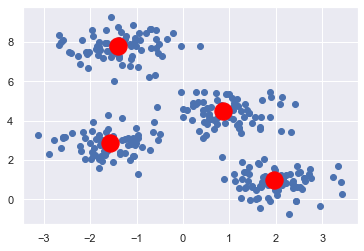

In [120]:
plt.scatter(X[:,0], X[:,1])
plt.scatter(mbk.cluster_centers_[:, 0], mbk.cluster_centers_[:, 1], s=300, c='red')

Here we can see that results are almost same for both the methods 
but the time taken by Mini batch K means is much less than the time taken by K-Means.

It can be very helpful while using large datasets. Though at times quality of the results can be reduced.

### What if our data is… non-numerical?

We could think of transforming our categorical values in numerical values and eventually apply k-means. But beware: k-means uses numerical distances, 
so it could consider close two really distant objects that merely have been assigned two close numbers.

K-modes is an extension of k-means. which as the name suggests uses modes instead of means.
A mode is a vector of elements that minimizes the dissimilarities between the vector itself and each object of the data. 
We will have as many modes as the number of clusters we required, since they act as centroids.

# 2. Hierarchical Clustering


Hierarchical clustering, as the name suggests is an algorithm that builds hierarchy of clusters.
It is a general family of clustering algorithms that build nested clusters by merging or splitting them successively. This hierarchy of clusters is represented as a tree (or dendrogram).

### Agglomerative (Bottom Up)
1.Start with 1 point (singleton).

2.Recursively add two or more appropriate clusters.

3.Stop when k number of clusters is achieved.

### Divisive (Top Down)
1.Start with a big cluster.

2.Recursively divides into smaller clusters.

3.Stop when k number of clusters is achieved




In [75]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

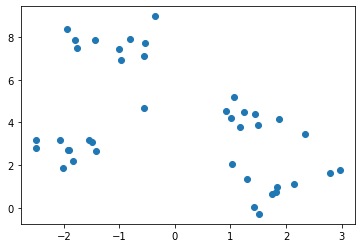

In [91]:
X1, y1 = make_blobs(n_samples=40, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X1[:,0], X1[:,1])

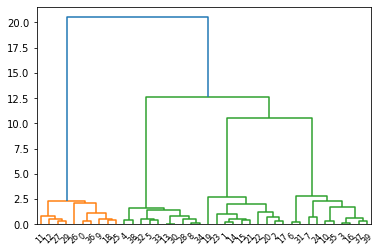

In [92]:
dendrogram = sch.dendrogram(sch.linkage(X1, method='ward'))

In [146]:
model = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
model.fit(X1)
labels = model.labels_

The linkage criteria determines the metric used for the merge strategy:

**Ward** minimizes the sum of squared differences within all clusters. It is a variance-minimizing approach and in this sense is similar to the k-means objective function but tackled with an agglomerative hierarchical approach.

**Maximum or complete linkage** minimizes the maximum distance between observations of pairs of clusters.

**Average linkage** minimizes the average of the distances between all observations of pairs of clusters.

**Single** linkage minimizes the distance between the closest observations of pairs of clusters.

However, the affinity (or distance used in clustering) cannot be varied with Ward, 
thus for non Euclidean metrics, average linkage is a good alternative. 
Single linkage, while not robust to noisy data, can be computed very efficiently 
and can therefore be useful to provide hierarchical clustering of larger datasets.
Single linkage can also perform well on non-globular data.

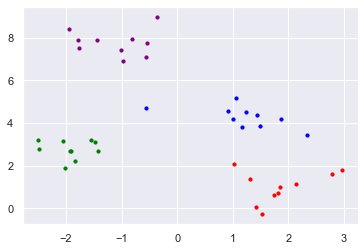

In [149]:
plt.scatter(X1[labels==0, 0], X1[labels==0, 1], s=10, marker='o', color='red')
plt.scatter(X1[labels==1, 0], X1[labels==1, 1], s=10, marker='o', color='blue')
plt.scatter(X1[labels==2, 0], X1[labels==2, 1], s=10, marker='o', color='green')
plt.scatter(X1[labels==3, 0], X1[labels==3, 1], s=10, marker='o', color='purple')
plt.show()

### Difference between K Means and Hierarchical clustering
Hierarchical clustering can’t handle big data well but K Means clustering can.

In K Means clustering, since we start with random choice of clusters, the results produced by running the algorithm multiple times might differ. While results are reproducible in Hierarchical clustering.

K Means is found to work well when the shape of the clusters is hyper spherical (like circle in 2D, sphere in 3D).
K Means clustering requires prior knowledge of K i.e. no. of clusters you want to divide your data into.

# 3. Density based Clustering

DBSCAN is a Density Based SCAN clustering algorithm. It is a connectivity based algorithm which consists of 3 points namely core, border and noise.

>The definition of dense region, a point can be classified as a Core Point which lie usually within the interior of a cluster. 

>A Border Point has fewer than MinPts within its ϵ-neighborhood (N), but it lies in the neighborhood of another core point. 

>Noise is any data point that is neither core nor border point. See the picture below for better understanding.

DBSCAN finds all clusters properly, independent of the size, shape, and location of clusters to each other.
DBscan is based on two main concepts: density reachability and density connectability

The main concept of DBSCAN algorithm is to locate regions of high density that are separated from one another by regions of low density. 




### Parameters

**Eps**: Two points are considered neighbors if the distance between the two points is below the threshold epsilon.

**Min_samples**: The minimum number of neighbors a given point should have in order to be classified as a core point. It’s important to note that the point itself is included in the minimum number of samples.

**Metric**: The metric to use when calculating distance between instances in a feature array (i.e. euclidean distance).

### Steps:-
    
>1.The algorithm starts with an arbitrary point which has not been visited and its neighborhood information is retrieved from the ϵ parameter

>2.If this point contains MinPts within ϵ neighborhood, cluster formation starts. Otherwise the point is labeled as noise. This point can be later found within the ϵ neighborhood of a different point and, thus can be made a part of the cluster.

>3.If a point is found to be a core point then the points within the ϵ neighborhood is also part of the cluster. So all the points found within ϵ neighborhood are added, along with their own ϵ neighborhood, if they are also core points.

>4.The above process continues until the density-connected cluster is completely found.

>5.The process restarts with a new point which can be a part of a new cluster or labeled as noise

In [96]:
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

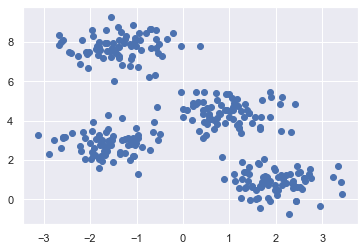

In [97]:
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:,0], X[:,1])

In [144]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

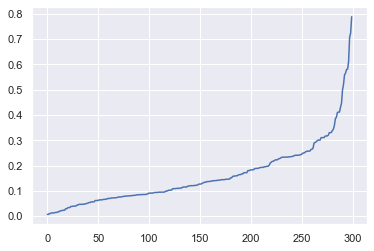

In [145]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

We have calculated the distance from each point to its closest neighbour using the NearestNeighbors. The point itself is included in n_neighbors. The kneighbors method returns two arrays, one which contains the distance to the closest n_neighbors points and the other which contains the index for each of those points.

In [100]:
m = DBSCAN(eps=0.3, min_samples=5)
m.fit(X)


DBSCAN(algorithm='auto', eps=0.3, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=1, p=None)

In [101]:
clusters = m.labels_

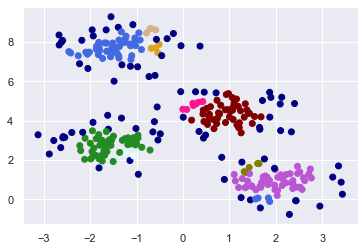

In [141]:
### colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])
plt.scatter(X[:,0], X[:,1], c=vectorizer(clusters))

The model classified the densely populated areas. As we can see, all the dark blue points were categorized as noise.

Unlike k-means, DBSCAN will figure out the number of clusters.
DBSCAN works by determining whether the minimum number of points are close enough to one another to be considered part of a single cluster. 
DBSCAN is very sensitive to scale since epsilon is a fixed value for the maximum distance between two points.

## Applications of Clustering
Clustering has a large number of applications spread across various domains. 
Some of the most popular applications of clustering are:

>Recommendation engines

>Market segmentation

>Social network analysis

>Search result grouping

>Medical imaging

>Image segmentation

>Anomaly detection

### References:-
    
https://towardsdatascience.com/log-book-guide-to-distance-measuring-approaches-for-k-means-clustering-f137807e8e21

https://towardsdatascience.com/machine-learning-algorithms-part-9-k-means-example-in-python-f2ad05ed5203

https://towardsdatascience.com/machine-learning-algorithms-part-12-hierarchical-agglomerative-clustering-example-in-python-1e18e0075019

https://amva4newphysics.wordpress.com/2016/10/26/into-the-world-of-clustering-algorithms-k-means-k-modes-and-k-prototypes/comment-page-1/

# *Thank You!!*